In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

The Reynolds number is 3128911 corresponding to a velocity of 50m/s and unit chord length

The flap is set at 20 degrees at (0.8, 0) and the slat at 10 degrees at (0.1, 0)

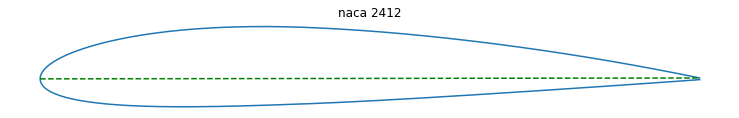

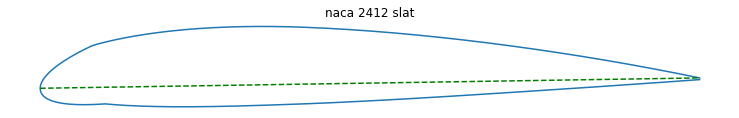

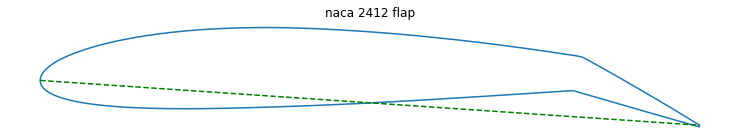

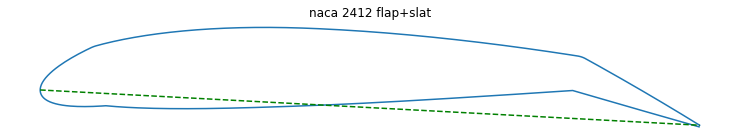

In [12]:
af_inputs = glob.glob('*2412*input.dat')

for filename in af_inputs[::-1]:
    adf = pd.DataFrame(np.loadtxt(filename, skiprows = 1), columns = ['x', 'y'])
    plt.figure(figsize = (13, 3))
    plt.plot(adf['x'], adf['y'])
    plt.plot([adf['x'].min(), adf['x'].max()], 
             [adf[adf['x']==adf['x'].min()]['y'].values[0], adf[adf['x']==adf['x'].max()]['y'].values[0]],
            color = 'green', linestyle = '--')
    plt.gca().set_aspect('equal')
    plt.axis('off')
    plt.title(filename.split('_')[0])
    plt.show()

In [2]:
def clean_nulls(list_):
    return [elem for elem in list_ if len(elem) != 0]

In [4]:
x_dats = glob.glob('*.dat')
x_dats = [item for item in x_dats if ('2412' in item and 'old' not in item and 'input' not in item)]
to_save_names = [file.split('.')[:-1][0] for file in x_dats]
x_op_dicts = dict()

to_save_names

['naca_2412_base', 'naca_2412_f', 'naca_2412_fs', 'naca_2412_s']

In [5]:
vars_ = clean_nulls(np.genfromtxt(x_dats[0], delimiter='|', dtype=None, encoding=None)[5].split(' '))
for ind, filename in enumerate(x_dats):
    data = np.loadtxt(filename, skiprows = 12)
    x_op_dicts[to_save_names[ind]] = pd.DataFrame(data = data, columns = vars_)

In [19]:
# for item in x_op_dicts.keys():
#     x_op_dicts[item]['L/D'] = x_op_dicts[item]['CL']/x_op_dicts[item]['CD']

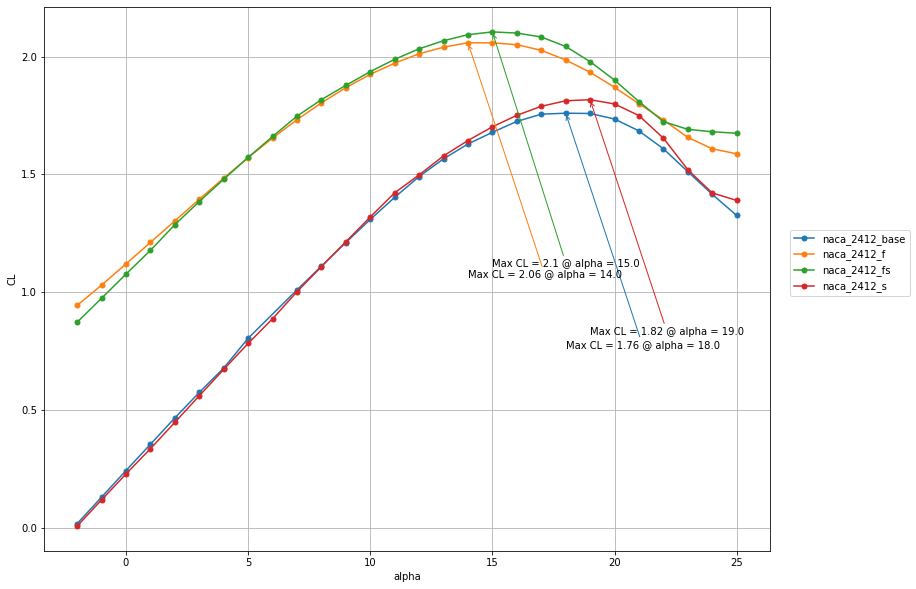

In [6]:
def plot_var_(plot_var, x_axis = 'alpha', maxx = True):
    cmap = plt.cm.get_cmap('tab10')
    plt.figure(figsize = (13, 10))
    for i, item in enumerate(x_op_dicts.keys()):
        df = x_op_dicts[item]
        plt.plot(df[x_axis], df[plot_var], marker = '.', markersize = 10, label = item, color = cmap(i))
        if maxx == True:   
            max_y = df[plot_var].max()
            max_x = df[df[plot_var]==df[plot_var].max()][x_axis].values[0]
            plt.annotate(f'Max {plot_var} = {round(max_y, 2)} @ {x_axis} = {round(max_x, 2)}',
                 xy=(max_x, max_y),
                 xytext=(max_x, max_y-1),  # Position of the text
                 arrowprops=dict(arrowstyle = '->', linewidth = 1, color = cmap(i)))

    plt.legend(bbox_to_anchor = (1.2, 0.6))
    plt.xlabel(x_axis)
    plt.ylabel(plot_var)
    plt.grid(True)
    
    plt.show()

plot_var_('CL', maxx = True)

As can be observed, the flaps "offsetted" the polar lift curve w.r.t the original, while the slats increased the maximum lift coefficient.

Though the increase in lift is not much since the slat is quite small. Can experiment with different angles of slats later.

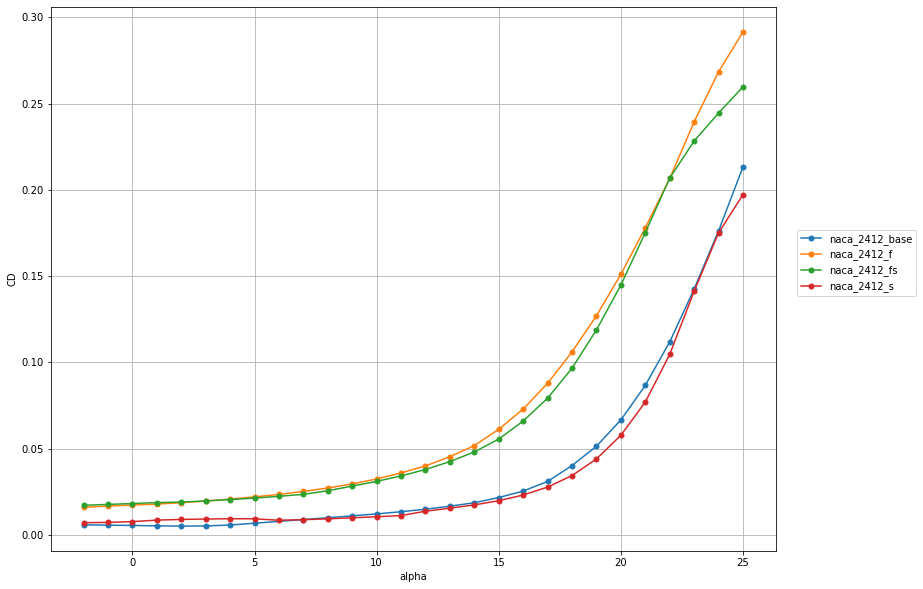

In [7]:
plot_var_('CD', maxx = False)

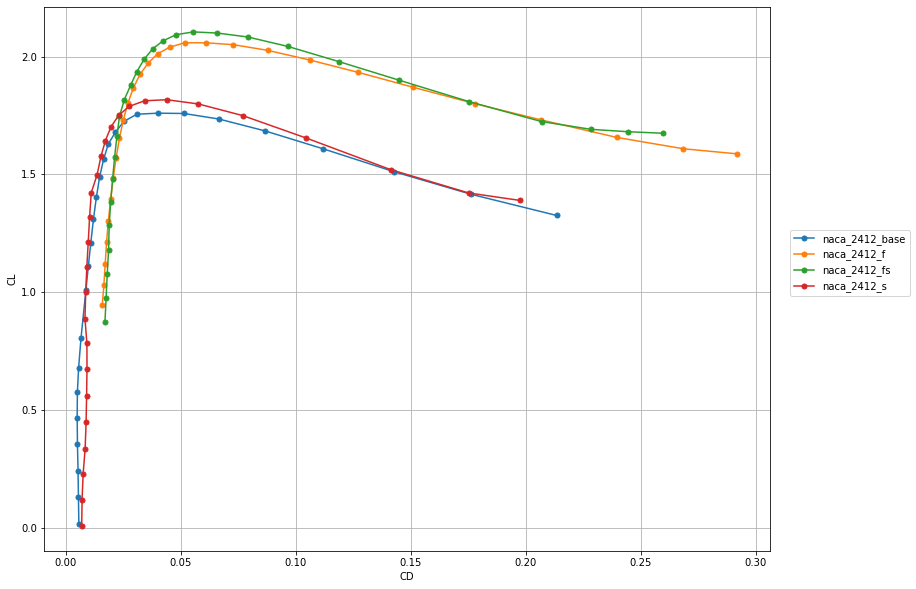

In [8]:
plot_var_('CL', 'CD', maxx = False)